##### Importing Packages 

In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
#  Modelling 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor
import warnings

##### Reading Data 

In [29]:
df=pd.read_csv('data/stud.csv')
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74


##### Preparing X and Y variables
- Selected Maths Score as an independent variable and all the categorical variables will be dependent variables /
 

In [30]:
X=df.drop('math_score',axis=1)
y=df['math_score']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### Checking Unique values in catergorical variables 

In [31]:
col=df.columns
cat_var=[i for i in col if df[i].dtype=='O']
for i in cat_var:
    print(f"No of unique values are {df[i].nunique()}: {df[i].unique()}")

No of unique values are 2: ['female' 'male']
No of unique values are 5: ['group B' 'group C' 'group A' 'group D' 'group E']
No of unique values are 6: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
No of unique values are 2: ['standard' 'free/reduced']
No of unique values are 2: ['none' 'completed']


In [32]:
# Creating Columns transformers for categorical variables 
Categ_v=X.select_dtypes(include="object").columns
Num_v=X.select_dtypes(exclude="object").columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor =ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,Categ_v),
        ("StandardScaler",numeric_transformer,Num_v)
    ]
)

In [33]:
X=preprocessor.fit_transform(X)

##### Splitting into Test and Train

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
X_train.shape,X_test.shape

((800, 19), (200, 19))

#### Creating a model evaluation function

In [40]:
def evaluate(true,predict):
    mae=mean_absolute_error(true,predict)
    mse=mean_squared_error(true,predict)
    rmse=np.sqrt(mse)
    r2=r2_score(true,predict)
    return mae,mse,rmse,r2



In [94]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTree":DecisionTreeRegressor(),
    "RandomForest":RandomForestRegressor(),
    "XGBRFRegressor":XGBRFRegressor(),
    # "CatBoost":CatBoostRegressor(),
    "AdaBoost":AdaBoostRegressor()
    
}
model_lst=[]
R2_lst=[]
train_metrics={}
test_metrics={}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    # make predictions 
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    # Evaluating Test and train Datasets 
    mae_train,mse_train,rmse_train,r2_train=evaluate(y_train,y_train_pred)
    mae_test,mse_test,rmse_test,r2_test=evaluate(y_test,y_test_pred)
    model_lst.append(list(models.keys())[i])
    train_metrics[i]=[{model_lst[i]:[mae_train,mse_train,rmse_train,r2_train]}]
    test_metrics[i]= [{model:[mae_test,mse_test,rmse_test,r2_test]}]
    R2_lst.append(r2_test)
    
    print(f"Model performance for training set of model: {list(models.keys())[i]}\n\
        Mean Absolute Error    :{mae_train}\n\
        Mean Squared  Error    :{mse_train}\n\
        Root Mean Squared Error:{rmse_train}\n\
        R2_Score               :{r2_train}")
    print(f"Model performance for Test set of model: {list(models.keys())[i]}\n\
        Mean Absolute Error    :{mae_test}\n\
        Mean Squared  Error    :{mse_test}\n\
        Root Mean Squared Error:{rmse_test}\n\
        R2_Score               :{r2_test}")
    print("*"*35)
    print("\n")
    
    
    
    

Model performance for training set of model: LinearRegression
        Mean Absolute Error    :4.247578125
        Mean Squared  Error    :28.4736865234375
        Root Mean Squared Error:5.3360740740208525
        R2_Score               :0.878085730190312
Model performance for Test set of model: LinearRegression
        Mean Absolute Error    :4.3265625
        Mean Squared  Error    :29.11220703125
        Root Mean Squared Error:5.395572910382177
        R2_Score               :0.8595160376814472
***********************************


Model performance for training set of model: Lasso
        Mean Absolute Error    :5.143909757249166
        Mean Squared  Error    :42.51090943664356
        Root Mean Squared Error:6.520039067110224
        R2_Score               :0.81798329911906
Model performance for Test set of model: Lasso
        Mean Absolute Error    :4.947869631765135
        Mean Squared  Error    :39.51800031198302
        Root Mean Squared Error:6.286334409811732
        R2_

In [86]:
train_metrics_t=pd.DataFrame(train_metrics,index=['MAE', 'MSE', 'RMSE','Rsq'])
test_metrics_t=pd.DataFrame(test_metrics,index=['MAE', 'MSE', 'RMSE','Rsq'])

In [95]:
Test_m=pd.DataFrame({'Models':model_lst,'R2_Score':R2_lst}).sort_values(by='R2_Score',ascending=False)
Test_m

,Models,R2_Score
2,Ridge,0.860086
0,LinearRegression,0.859516
6,XGBRFRegressor,0.828294
5,RandomForest,0.826559
7,AdaBoost,0.819996
1,Lasso,0.809302
3,KNeighborsRegressor,0.740937
4,DecisionTree,0.695239


In [98]:
linmodel=LinearRegression(fit_intercept=True)
linmodel.fit(X_train,y_train)
y_pred=linmodel.predict(X_test)
score=r2_score(y_test,y_pred)*100
print(f"Accuracy of the model is {round(score,2)}%")

Accuracy of the model is 85.95%


Plotting Ytest and ypred

<Axes: xlabel='math_score'>

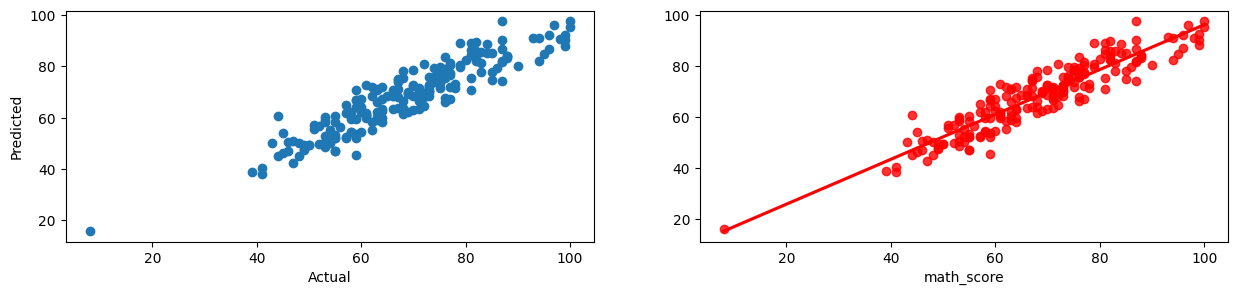

In [104]:
plt.subplots(1,2,figsize=(15,3))
plt.subplot(1,2,1)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.subplot(1,2,2)
sns.regplot(x=y_test,y=y_pred,color='red',ci=None)

In [106]:
p_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Residuals':y_test-y_pred}).sort_values(by='Actual',ascending=False)
p_df

,Actual,Predicted,Residuals
149,100,97.6250,2.3750
458,100,95.5000,4.5000
263,99,88.1250,10.8750
114,99,92.4375,6.5625
306,99,90.2500,8.7500
...,...,...,...
874,43,50.1875,-7.1875
72,41,38.2500,2.7500
424,41,40.3750,0.6250
61,39,38.6875,0.3125
